# Funções


In [ ]:
#@title FUNctions
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
%matplotlib inline
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

def resetting_parameters(string = 'INAK'):
  if string == 'INAK':
    pars = {'Cm' : 1.,
            'gl' : 8.,
            'El' : -80., # -78 (Fig 4.1b)
            'gna' : 20.,
            'Ena' : 60.,
            'gk' : 10.,
            'Ek' : -90.,
            'V12_m' : -20.,
            'V12_n' : -25., # -45 (Fig 4.1b)
            'k_m' : 15.,
            'k_n' : 5.,
            'tau' : 0.152 # 1.
            }
  elif string == 'SQIF':
    pars = { 'Tonic Spiking': 
            {'a': .02, 'b': .2, 'c': -65, 'd': 6, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 14, 'v_peak': 30.,
             'tempo': 100, 'v0': -70, 'dt': 0.25, 'shape': 'DC'},
            'Phasic Spiking': 
            {'a': .02, 'b': .25, 'c': -65, 'd': 6, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': .5, 'v_peak': 30.,
             'tempo': 200, 'v0': -64, 'dt': 0.25, 'shape': 'DC'},
            'Tonic Bursting': 
            {'a': .02, 'b': .2, 'c': -50, 'd': 2, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 15, 'v_peak': 30.,
             'tempo': 220, 'v0': -70, 'dt': 0.25, 'shape': 'DC'},
            'Phasic Bursting': 
            {'a': .02, 'b': .25, 'c': -55, 'd': .05, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': .6, 'v_peak': 30.,
             'tempo': 200, 'v0': -64, 'dt': 0.2, 'shape': 'DC'},
            'Mixed Mode': 
            {'a': .02, 'b': .2, 'c': -55, 'd': 4, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 10, 'v_peak': 30.,
             'tempo': 160, 'v0': -70, 'dt': 0.25, 'shape': 'DC'},
            'Spike Frequency Adaptation': 
            {'a': .01, 'b': .2, 'c': -65, 'd': 8, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 30, 'v_peak': 30.,
             'tempo': 85, 'v0': -70, 'dt': 0.25, 'shape': 'DC'},
            'Class 1': 
            {'a': .02, 'b': -.1, 'c': -55, 'd': 6, 'e': 0.04, 
             'f': 4.1, 'g': 108, 'I': 0, 'v_peak': 30.,
             'tempo': 300, 'v0': -60, 'dt': 0.25, 'shape': '1'},
            'Class 2': 
            {'a': .2, 'b': .26, 'c': -65, 'd': 0, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 0, 'v_peak': 30.,
             'tempo': 300, 'v0': -64, 'dt': 0.25, 'shape': '2'},
            'Spike Latency': 
            {'a': .02, 'b': .2, 'c': -65, 'd': 6, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 7.04, 'v_peak': 30.,
             'tempo': 100, 'v0': -70, 'dt': 0.2, 'shape': '3'},
            'Subthreshold Oscilations': 
            {'a': .05, 'b': .26, 'c': -60, 'd': 0, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 2., 'v_peak': 30.,
             'tempo': 200, 'v0': -62, 'dt': 0.25, 'shape': '4'},
            'Resonator': 
            {'a': .1, 'b': .26, 'c': -60, 'd': -1, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': .65, 'v_peak': 30.,
             'tempo': 400, 'v0': -62, 'dt': 0.25, 'shape': '5'},
            'Integrator': 
            {'a': .02, 'b': -.1, 'c': -55, 'd': 6, 'e': 0.04, 
             'f': 4.1, 'g': 108, 'I': 9, 'v_peak': 30.,
             'tempo': 100, 'v0': -60, 'dt': 0.25, 'shape': '6'},
            'Rebound Spike': 
            {'a': .03, 'b': .25, 'c': -60, 'd': 4, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': -15, 'v_peak': 30.,
             'tempo': 200, 'v0': -64, 'dt': 0.2, 'shape': '4'},
            'Rebound Burst': 
            {'a': .03, 'b': .25, 'c': -52, 'd': 0, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': -15, 'v_peak': 30.,
             'tempo': 200, 'v0': -64, 'dt': 0.2, 'shape': '4'},
            'Threshold Variability': 
            {'a': .03, 'b': .25, 'c': -60, 'd': 4, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': -6, 'v_peak': 30.,
             'tempo': 100, 'v0': -64, 'dt': 0.5, 'shape': '7'},
            'Bistability': 
            {'a': .1, 'b': .26, 'c': -60, 'd': 0, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 1.24, 'v_peak': 30.,
             'tempo': 300, 'v0': -61, 'dt': 0.25, 'shape': '8'},
            'DAP': 
            {'a': 1., 'b': .2, 'c': -60, 'd': -21, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 20, 'v_peak': 30.,
             'tempo': 50, 'v0': -70, 'dt': 0.1, 'shape': '9'},
            'Accomodation': 
            {'a': .02, 'b': 1., 'c': -55, 'd': 4, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 0, 'v_peak': 30.,
             'tempo': 400, 'v0': -65, 'dt': 0.5, 'shape': '10'},
            'Inhibition-Induced Spiking': 
            {'a': -.02, 'b': -1., 'c': -60, 'd': 8, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 80, 'v_peak': 30.,
             'tempo': 350, 'v0': -63.8, 'dt': 0.5, 'shape': '11'},
            'Inhibition-Induced Bursting': 
            {'a': -.026, 'b': -1., 'c': -45, 'd': 0, 'e': 0.04 , 
             'f': 5, 'g': 140, 'I': 80, 'v_peak': 30.,
             'tempo': 350, 'v0': -63.8, 'dt': 0.5, 'shape': '11'}
      }
  elif string == 'SM':
    pars = {
        'Cm': 100,
        'v_t': -40,
        'v_r': -60,
        'v_b': -55,
        'v_peak': 35,
        'a': 0.03,
        'b': -2,
        'c': -50,
        'd': 100,
        'k': 0.7,
        'I': 70.
    }
  elif string == 'SM1':
    pars = {
        'Cm': 20,
        'v_t': -40,
        'v_r': -55,
        'v_b': -55,
        'v_peak': 25,
        'a': 0.15,
        'b': 8,
        'c': -55,
        'd': 200,
        'k': 1.,
        'I': 70.
    }
  return pars

def Simple_Quadratic_IF_Null(V, pars, I = 0.):
  u_v = I + pars['e'] * V ** 2 + pars['f'] * V + pars['g']
  u_u = pars['b'] * V
  if (pars['a'] == .02 and pars['b'] == 1 and pars['c'] == -55 and pars['d'] == 4):
    u_u = 65 / (pars['b'] * pars['a']) + V * 0
  return u_v, u_u

def Simple_Quadratic_IF(variables, pars, I = 0.):
  v = I + pars['e'] * variables[0] ** 2 + pars['f'] * variables[0] - variables[1] + pars['g']
  u = pars['a'] * (pars['b'] * variables[0] - variables[1])
  if (pars['a'] == .02 and pars['b'] == 1 and pars['c'] == -55 and pars['d'] == 4):
    u = pars['a'] * (pars['b'] * variables[0] + 65)
  q = np.array([v, u])
  return q

def Simple_model(variables, pars, I = 0.):
  v = (1/pars['Cm']) * (pars['k'] * (variables[0] - pars['v_r']) * (variables[0] - pars['v_t']) - variables[1] + I)
  u = pars['a'] * (pars['b'] * (variables[0] - pars['v_r']) - variables[1])
  q = np.array([v,u])
  return q

def Simple_model_Null(V, pars, I = 0.):
  u_v = pars['k'] * (V - pars['v_r']) * (V - pars['v_t']) + I
  u_u = pars['b'] * (V - pars['v_r'])
  return u_v, u_u

def my_fp(pars, I, rE_init, rI_init):
  """
  Use opt.root function to solve Diferential Equations
  """

  def my_DEr(x):
    
    V, n = x

    dV = (1/pars['Cm']) * (pars['k'] * 
                           (V - pars['v_r']) * (V - pars['v_t'])
                            - n + I)
  
    # m = (m_in f - variables[1])/pars['tau']
    dn = pars['a'] * (pars['b'] * (V - pars['v_r']) - n)
    
    y = np.array([dV, dn])

    return y

  x0 = np.array([rE_init, rI_init])
  x_fp = opt.root(my_DEr, x0).x

  return x_fp

def InapIk_DEs(variables, pars, I = 0.):
  
  m_inf = 1/(1 + np.exp((pars['V12_m'] - variables[0])/pars['k_m']))
  n_inf = 1/(1 + np.exp((pars['V12_n'] - variables[0])/pars['k_n']))
  
  V = (1/pars['Cm']) * (I - pars['gl'] * (variables[0] - pars['El']) - 
                        pars['gna'] * m_inf * #variables[1] * 
                        (variables[0] - pars['Ena']) - 
                        pars['gk'] * variables[2] * 
                        (variables[0] - pars['Ek']))
  
  m = 0.#(m_inf - variables[1])/pars['tau']
  n = (n_inf - variables[2])/pars['tau']

  q=np.array([V,m,n])
  return q

def fhn_DEs(variables, pars, I = 10.0):
    oneoverepsilon = 100.0 
    zeta = 0.9
    q1 = oneoverepsilon*(variables[0]*(1-variables[0]*variables[0]/3.) - variables[1] + I)
    q2 = variables[0] + zeta 
    q=np.array([q1,q2])
    return q

def fhn_DE(variables, pars, I = 10.0):
    a = 0.7
    b = 0.8
    c = 0.08

    q1 = variables[0] - variables[0]**3 / 3 - variables[1] + current
    q2 = c * (variables[0] +a - b * variables[1])
    q=np.array([q1,q2])
    return q

def HH_DEs(variables, pars, I = 0):
    gk = 36.
    gna = 120.
    gl = .3
    Ek = -12.
    Ena = 115.
    El = 10.613
    Cm = 1.
    
    alpha_m = 0.1 * (25 - variables[0]) / (np.exp((25 - variables[0]) / 10) - 1)
    beta_m = 4 * np.exp(-variables[0] / 18)
    alpha_n = 0.01 * (10 - variables[0]) / (np.exp((10 - variables[0])  /10) - 1)
    beta_n = 0.125 * np.exp(-variables[0] / 80)
    alpha_h = 0.07 * np.exp(-variables[0] / 20)
    beta_h = 1 / (np.exp(3 - variables[0] / 10) + 1)
    
    V = (1/Cm) * (gk * variables[3]**4 * (Ek - variables[0]) + gna * 
                  variables[1]**3 * variables[2] * 
                  (Ena - variables[0])+ gl * 
                  (El - variables[0]) + I)
    
    m = alpha_m * (1 - variables[1]) - beta_m * variables[1]
    h = alpha_h * (1 - variables[2]) - beta_h * variables[2]
    n = alpha_n * (1 - variables[3]) - beta_n * variables[3]
    
    q=np.array([V, m, h, n])
    return q

def rk4(ODE, variables, pars, current, tempo, deltat):
    
    dim = len(variables)
    
    k1 = np.zeros([1,dim])
    k2 = np.zeros([1,dim])
    k3 = np.zeros([1,dim])
    k4 = np.zeros([1,dim])
    
    deri = ODE(variables, pars, I = current)
    k1 = deltat*deri
    aux = 0.5*k1 + variables

    deri = ODE(aux, pars, I = current)
    k2 = deltat*deri
    aux = k2*0.5+ variables
    
    deri = ODE(aux, pars, I = current)
    k3 = deltat*deri
    aux = k3+variables
    
    deri = ODE(aux, pars, I = current)
    k4 = deltat*deri
    
    variables_novas = variables + (k1+2*k2+2*k3+k4)/6.0

    return variables_novas

def Euler(ODE, variables, pars, current, tempo, deltat):
    
    dim = len(variables)
    
    k1 = np.zeros([1,dim])
    
    deri = ODE(variables, pars, I = current)
    k1 = deltat*deri
    
    variables_novas = variables + k1

    return variables_novas

def simula(ODE, current, pars, dt, t, x0, IF = False):
    passos = round(t / dt)
    
    x = np.zeros([passos+1,len(x0)])
    x[0] = x0
    
    xvelho = np.array(x[0])
    xnovo = np.array(x[0])
    
    for i in range(passos+1):
        xnovo[:] = Euler(ODE, xvelho, pars, current[i], t, dt)
        if IF:
          if xnovo[0] >= pars['v_peak']:
            x[i-1,:] = pars['v_peak']
            xnovo[0] = pars['c']
            xnovo[1] += pars['d']
            # print(pars['I'],':', pars['v_peak'], xnovo)
        x[i,:] = xnovo
        xvelho[:] = xnovo
    
    return x


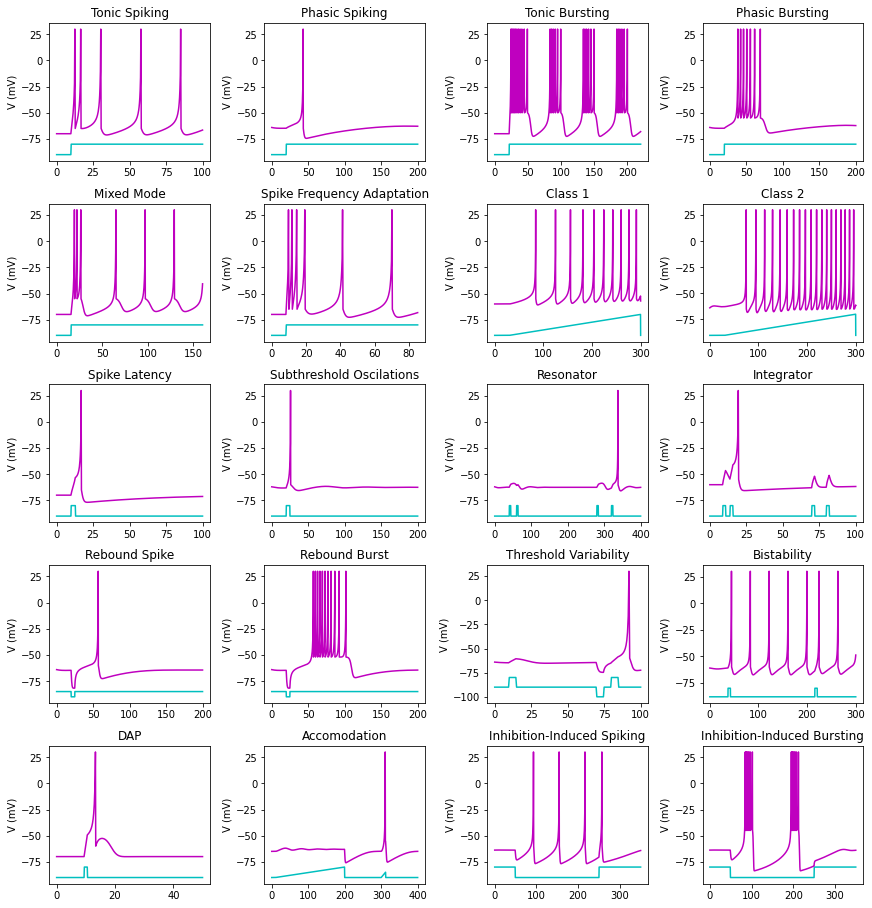

In [ ]:
#@title Reproduzindo fig 8.8
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='cmkb')
p = resetting_parameters('SQIF')
# k = p.keys()
# print(k)
# key = 'Tonic Spiking'
fig1, ax = plt.subplots(5,4, figsize = [12, 12.5], constrained_layout = True)
# fig2, ax1 = plt.subplots(4,5, figsize = [15,10], constrained_layout = True)
# fig2, ax1 = plt.subplots(5,4, figsize = [12, 12.5], constrained_layout = True)

axis_grid = []
for i in range(5):
  for j in range(4):
    axis_grid.append([i,j])

k = 0
for key, pars in p.items():
  
  i = axis_grid[k][0]
  j = axis_grid[k][1]
  k += 1

  dt = pars['dt']
  tempo = pars['tempo']
  T = tempo/10
  t = dt*np.arange(1+round(tempo/dt))
  
  v0 = pars['v0']
  u0 = round(pars['b'] * v0,2)

  current = np.zeros(1+round(tempo / dt)) #* 100

  if pars['shape'] == '1':
    current[round(T/(dt)):-1] = t[:-round(T/(dt))-1]*0.075
    ax[i,j].plot(t,current*(20/max(current))-90)
  elif pars['shape'] == '2':
    current[:] = - 0.05
    current[round(T/(dt)):-1] = - 0.05 + t[:-round(T/(dt))-1]*0.015
    ax[i,j].plot(t,current*(20/max(current))-90)
  elif pars['shape'] == '3':
    current[round(T/dt):round((T+3)/dt)] = pars['I']
    ax[i,j].plot(t,current*(10/pars['I'])-90)
  elif pars['shape'] == '4':
    current[round(T/dt):round((T+5)/dt)] = pars['I']
    if pars['I'] > 0:
      ax[i,j].plot(t,current*(10/pars['I'])-90)
    else:
      ax[i,j].plot(t,current*(-5/pars['I'])-85)
  elif pars['shape'] == '5':
    current[round(T/dt):round((T+4)/dt)] = pars['I']
    current[round((T+20)/dt):round((T+24)/dt)] = pars['I']
    current[round((0.7*tempo)/dt):round((0.7*tempo+4)/dt)] = pars['I']
    current[round((0.7*tempo+40)/dt):round((0.7*tempo+44)/dt)] = pars['I']
    ax[i,j].plot(t,current*(10/pars['I'])-90)
  elif pars['shape'] == '6':
    current[round((tempo/11)/dt):round((tempo/11+2)/dt)] = pars['I']
    current[round((tempo/11+5)/dt):round((tempo/11+7)/dt)] = pars['I']
    current[round((0.7*tempo)/dt):round((0.7*tempo+2)/dt)] = pars['I']
    current[round((0.7*tempo+10)/dt):round((0.7*tempo+12)/dt)] = pars['I']
    ax[i,j].plot(t,current*(10/pars['I'])-90)
  elif pars['shape'] == '7':
    current[round(T/dt):round((T+5)/dt)] = 1
    current[round((T+70)/dt):round((T+75)/dt)] = 1
    current[round((T+60)/dt):round((T+65)/dt)] = -6
    current1 = np.ones(1+round(tempo / dt)) * -90
    current1[round(T/dt):round((T+5)/dt)] = -80
    current1[round((T+70)/dt):round((T+75)/dt)] = -80
    current1[round((T+60)/dt):round((T+65)/dt)] = -100
    ax[i,j].plot(t,current1)
  elif pars['shape'] == '8':
    current[:] = pars['I'] - 1
    current[round((tempo/8)/dt):round((tempo/8+5)/dt)] = pars['I']
    current[round((216)/dt):round((221)/dt)] = pars['I']
    ax[i,j].plot(t,current*(10/pars['I'])-90)
  elif pars['shape'] == '9':
    T += 5.
    # print(t[np.abs(t-T)<1], t[round((T-1)/dt)+1:round((T+1)/dt)])
    current[round((T-.5)/dt):round((T+.5)/dt)+1] = pars['I']
    ax[i,j].plot(t,current*(10/pars['I'])-90)
  elif pars['shape'] == '10':
    u0 = -16
    current[round(10/dt):round(200/(dt))] = t[:round((200-10)/(dt))]/25
    current[round(300/dt):round(312.5/dt)] = (t[round(300/dt):round(312.5/dt)]-300)/12.5 * 4
    ax[i,j].plot(t,current*(10/max(current))-90)
  elif pars['shape'] == '11':
    current[:] = pars['I'] - 5
    current[:round(50/dt)-1] = pars['I']
    current[round(250/dt)+1:] = pars['I']
    current1 = np.ones(1+round(tempo / dt)) * -90
    current1[:round(50/dt)-1] = -80
    current1[round(250/dt)+1:] = -80
    ax[i,j].plot(t,current1)
  else:
    current[round(T/(dt)):] = pars['I']
    ax[i,j].plot(t,current*(10/pars['I'])-90)

  init = [v0, u0]
  # print(key,':', init, ',', pars)

  q=simula(Simple_Quadratic_IF, current, pars, dt, tempo, init, True)
  V_init = np.arange(v0, v0 + 100, 0.1)
  V, U = Simple_Quadratic_IF_Null(V_init, pars, pars['I'])
  # ax1[i,j].set_title(key)
  # ax1[i,j].plot(V_init, V,'-')
  # ax1[i,j].plot(V_init, U,'-')
  # ax1[i,j].set_ylabel('U (mV)')
  # ax1[i,j].set_ylim(bottom = u0, top = u0 + 50)
  # with plt.xkcd():
  ax[i,j].set_title(key)
  ax[i,j].plot(t, q[:,0],'-')
  ax[i,j].set_ylabel('V (mV)')
fig1.savefig('bigfig')
plt.show()

40 :real
50 :real
51.42857142857156 :real
60 :real
70 :real


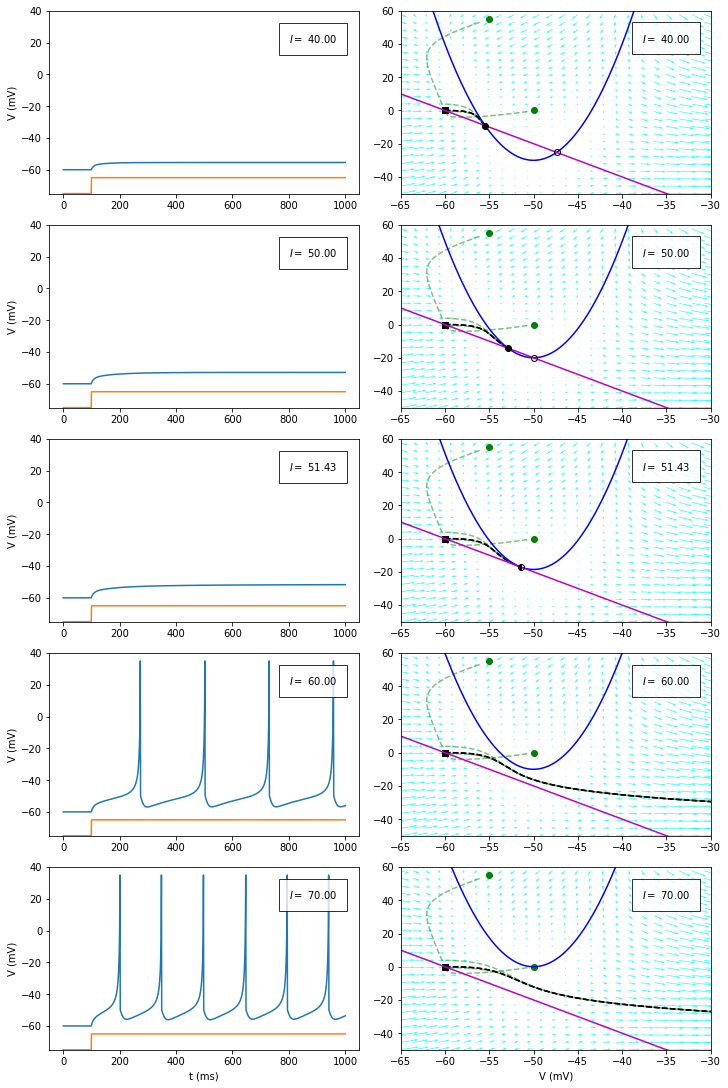

In [ ]:
#@title Testando o Modelo quadrático
fig, ax = plt.subplots(5,2, figsize = [10, 15], constrained_layout = True)

pars = resetting_parameters('SM')

# Is = np.arange(50, 70, 2)
a = pars['k']
b = - pars['k'] * (pars['v_t'] + pars['v_r']) - pars['b']
c_1 = pars['v_r'] * (pars['k'] * pars['v_t'] + pars['b'])
I_bif = b ** 2 / (4 * a) - c_1
# print(I_bif)
Is = [40, 50, I_bif, 60, 70] 
k = 0

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

    for I in Is:
        # fig, ax = plt.subplots(1,2, figsize = (10, 2))
        pars['I'] = I

        dt = 1
        tempo = 1000
        T = tempo/10
        t = dt*np.arange(1+round(tempo/dt))

        v0 = pars['v_r'] #pars['b'] / pars['k'] + pars['v_t']#-40
        u0 = 0 #pars['b'] * (v0 - pars['v_r'])#-30
        current = np.zeros(1+round(tempo / dt))
        current[round(T/(dt)):] = pars['I']

        init = [v0, u0]
        q=simula(Simple_model, current, pars, dt, tempo, init, True)

        V = np.arange(-65, 35, 0.1)
        u_v, u_u = Simple_model_Null(V, pars, pars['I'])

        grid_ = np.linspace(-65., -30., 50)
        grid_1 = np.linspace(-50., 60., 50)
        grid_v, grid_n = np.meshgrid(grid_, grid_1)
        DEs = Simple_model([grid_v, grid_n], pars, I)
        dVdt = DEs[0]
        dndt = DEs[1]
        #print(dVdt)
        n_skip = 2
        ax[k,1].quiver(grid_v[::n_skip, ::n_skip], grid_n[::n_skip, ::n_skip],
                    dVdt[::n_skip, ::n_skip], dndt[::n_skip, ::n_skip],
                    angles='xy', scale_units='xy', scale=1., facecolor='cyan', alpha = 0.8)
        
        x_inits = [[-55,55], [-50, 0], [v0, u0], [pars['v_r'], 0]]
        for x_init in x_inits:
            cl = 'green'
            al = 0.5
            m = 'o'
            if x_init == [v0, u0]:
              cl = 'k'
              al = 1.
              m = 's'
            q1 = simula(Simple_model, current, pars, dt, tempo, x_init, False)
            ax[k,1].plot(q1[:,0], q1[:,1], '--', color = cl, alpha = al)
            ax[k,1].plot(x_init[0], x_init[1], m, color = cl)

        ax[k,0].plot(t, q[:,0])
        ax[k,0].plot(t, current * (10/pars['I']) - 75)
        ax[k,1].plot(V, u_v, 'b-')
        ax[k,1].plot(V, u_u, 'm-')

        if I <= I_bif:
            a = pars['k']
            b = - pars['k'] * (pars['v_t'] + pars['v_r']) - pars['b']
            c = pars['v_r'] * (pars['k'] * pars['v_t'] + pars['b']) + pars['I'] 
            v_fps_menos = (- b - np.sqrt(b ** 2 - 4 * a * c))/(2*a)
            v_fps_mais = (- b + np.sqrt(b ** 2 - 4 * a * c))/(2*a)
            u_fps_menos = pars['b'] * (v_fps_menos - pars['v_r'])
            u_fps_mais = pars['b'] * (v_fps_mais - pars['v_r'])
            x_fps = [v_fps_menos, u_fps_menos]
            x_fps1 = [v_fps_mais, u_fps_mais]
            # print(x_fps_menos)
            # x_fps = my_fp(pars, pars['I'], 0, -60)
            # x_fps1 = my_fp(pars, pars['I'], 4, -65)
            if x_fps[0] != x_fps1[0]:
                ax[k,1].plot(x_fps[0], x_fps[1], 'o', color = 'k')
                ax[k,1].plot(x_fps1[0], x_fps1[1], 'o', color = 'k',fillstyle = 'none')
            else:
                ax[k,1].plot(x_fps[0], x_fps[1], 'o', color = 'k', fillstyle = 'left')
        
        # ax[k,1].plot(q[:,0], q[:,1], '--', color = 'k', alpha = 0.5)
        # ax[k,1].plot(init[0], init[1], 's', color = 'k', alpha = 0.7)

        ax[k,0].set_ylim(bottom = -75, top = 40)
        # ax[0].set_xlim(left = -65, right = -30)
        ax[k,1].set_ylim(bottom = -50, top = 60)
        ax[k,1].set_xlim(left = -65, right = -30)
        ax[k,0].set_ylabel('V (mV)')
        ax[k,0].text(800, 20, r'$I =$ {:.2f}'.format(pars['I']), #style='italic',
                  bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        ax[k,1].text(-37.8, 41, r'$I =$ {:.2f}'.format(pars['I']), #style='italic',
                  bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        # ax[k,1].set_ylabel('u')
        if pars['b'] <= (pars['k'] * (2 * v_fps_menos - pars['v_t'] - pars['v_r']) + pars['a']) ** 2 / (4 * pars['a']):
          print(I, ':real')
        k+=1
        # if (u_v <= 0.).any():
        #   ax[1].plot(V[u_v <= 0.][0], u_v[u_v <= 0.][0],'o')
    ax[4,0].set_xlabel('t (ms)')
    ax[4,1].set_xlabel('V (mV)')
    plt.savefig('exercício12')
    plt.show()

400 :real
230 :real
132.25 :real
125 :real
100 :real


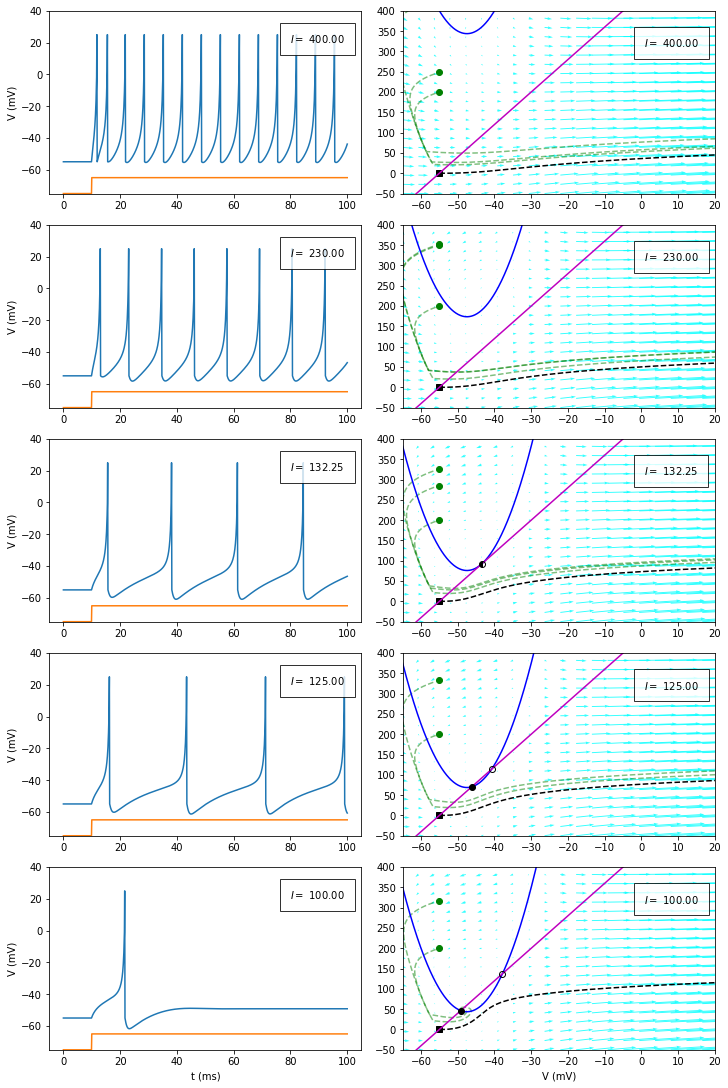

In [ ]:
#@title Testando o Modelo quadrático
fig, ax = plt.subplots(5,2, figsize = [10, 15], constrained_layout = True)

pars = resetting_parameters('SM1')
x_lim = 20
y_lim = 400
# Is = np.arange(50, 70, 2)
a = pars['k']
b = - pars['k'] * (pars['v_t'] + pars['v_r']) - pars['b']
c_1 = pars['v_r'] * (pars['k'] * pars['v_t'] + pars['b'])
I_bif = b ** 2 / (4 * a) - c_1
# print(I_bif)
Is = [400, 230, I_bif, 125, 100] #[40, 50, I_bif, 60, 70] 
k = 0

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

    for I in Is:
        # fig, ax = plt.subplots(1,2, figsize = (10, 2))
        pars['I'] = I

        dt = .1
        tempo = 100
        T = tempo/10
        t = dt*np.arange(1+round(tempo/dt))

        v0 = pars['v_r'] #pars['b'] / pars['k'] + pars['v_t']#-40
        u0 = 0 #pars['b'] * (v0 - pars['v_r'])#-30
        current = np.zeros(1+round(tempo / dt))
        current[round(T/(dt)):] = pars['I']

        init = [v0, u0]
        q=simula(Simple_model, current, pars, dt, tempo, init, True)

        V = np.arange(-65, 35, 0.1)
        u_v, u_u = Simple_model_Null(V, pars, pars['I'])

        grid_ = np.linspace(-65., x_lim, 100)
        grid_1 = np.linspace(-50., y_lim, 100)
        grid_v, grid_n = np.meshgrid(grid_, grid_1)
        DEs = Simple_model([grid_v, grid_n], pars, I)
        dVdt = DEs[0]
        dndt = DEs[1]
        #print(dVdt)
        n_skip = 5
        ax[k,1].quiver(grid_v[::n_skip, ::n_skip], grid_n[::n_skip, ::n_skip],
                    dVdt[::n_skip, ::n_skip], dndt[::n_skip, ::n_skip],
                    angles='xy', scale_units='xy', scale=10., facecolor='cyan', alpha = 0.8)
        
        x_inits = [[v0, u0], [pars['v_r'], 200]]
        if I == 400:
          x_inits.append([-55, 434])
          x_inits.append([-55, 248.5])
        if I == 230:
          x_inits.append([-55, 352.3])
          x_inits.append([-55, 350.])
        if I == I_bif:
          x_inits.append([-55, 325.8])
          x_inits.append([-55, 285.08])
        if I == 125:
          x_inits.append([-55, 332.8])
        if I == 100:
          x_inits.append([-55, 317.4])
        for x_init in x_inits:
            cl = 'green'
            al = 0.5
            m = 'o'
            if x_init == [v0, u0]:
              cl = 'k'
              al = 1.
              m = 's'
            q1 = simula(Simple_model, current, pars, dt, tempo, x_init, False)
            ax[k,1].plot(q1[:,0], q1[:,1], '--', color = cl, alpha = al)
            ax[k,1].plot(x_init[0], x_init[1], m, color = cl)

        ax[k,0].plot(t, q[:,0])
        ax[k,0].plot(t, current * (10/pars['I']) - 75)
        ax[k,1].plot(V, u_v, 'b-')
        ax[k,1].plot(V, u_u, 'm-')

        if I <= I_bif:
            a = pars['k']
            b = - pars['k'] * (pars['v_t'] + pars['v_r']) - pars['b']
            c = pars['v_r'] * (pars['k'] * pars['v_t'] + pars['b']) + pars['I'] 
            v_fps_menos = (- b - np.sqrt(b ** 2 - 4 * a * c))/(2*a)
            v_fps_mais = (- b + np.sqrt(b ** 2 - 4 * a * c))/(2*a)
            u_fps_menos = pars['b'] * (v_fps_menos - pars['v_r'])
            u_fps_mais = pars['b'] * (v_fps_mais - pars['v_r'])
            x_fps = [v_fps_menos, u_fps_menos]
            x_fps1 = [v_fps_mais, u_fps_mais]
            # print(x_fps_menos)
            # x_fps = my_fp(pars, pars['I'], 0, -60)
            # x_fps1 = my_fp(pars, pars['I'], 4, -65)
            if x_fps[0] != x_fps1[0]:
                ax[k,1].plot(x_fps[0], x_fps[1], 'o', color = 'k')
                ax[k,1].plot(x_fps1[0], x_fps1[1], 'o', color = 'k',fillstyle = 'none')
            else:
                ax[k,1].plot(x_fps[0], x_fps[1], 'o', color = 'k', fillstyle = 'left')
        
        # ax[k,1].plot(q[:,0], q[:,1], '--', color = 'k', alpha = 0.5)
        # ax[k,1].plot(init[0], init[1], 's', color = 'k', alpha = 0.7)

        ax[k,0].set_ylim(bottom = -75, top = 40)
        # ax[0].set_xlim(left = -65, right = -30)
        ax[k,1].set_ylim(bottom = -50, top = y_lim)#(bottom = -50, top = 60)
        ax[k,1].set_xlim(left = -65, right = x_lim)#(left = -65, right = -30)
        ax[k,0].set_ylabel('V (mV)')
        ax[k,0].text(80, 20, r'$I =$ {:.2f}'.format(pars['I']), #style='italic',
                  bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        ax[k,1].text(.8, 311, r'$I =$ {:.2f}'.format(pars['I']), #style='italic',
                  bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        # ax[k,1].set_ylabel('u')
        if pars['b'] <= (pars['k'] * (2 * v_fps_menos - pars['v_t'] - pars['v_r']) + pars['a']) ** 2 / (4 * pars['a']):
          print(I, ':real')
        k+=1
        # if (u_v <= 0.).any():
        #   ax[1].plot(V[u_v <= 0.][0], u_v[u_v <= 0.][0],'o')
    ax[4,0].set_xlabel('t (ms)')
    ax[4,1].set_xlabel('V (mV)')
    plt.savefig('exercicio12_ele')
    plt.show()

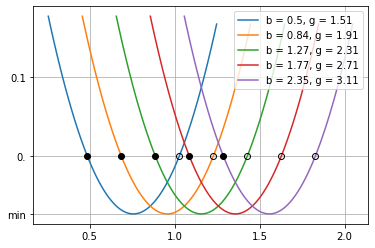

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

b = .5
a = .2
g_init = np.sqrt(4 * b) + .1

for g in [g_init, g_init + 2 * a, g_init + 4 * a, g_init + 6 * a, g_init + 8 * a]:

  if g != g_init:
    b += g * a - a ** 2
  v_min = g/2

  v = np.arange(v_min - .5, v_min + .5, 0.01)
  vdot = b - g * v + v ** 2
  v_menos = (g - np.sqrt(g ** 2 - 4 * b))/2
  v_mais = (g + np.sqrt(g ** 2 - 4 * b))/2

  plt.plot(v, vdot, label = 'b = {b}, g = {g}'.format(b = round(b, 2), g = round(g, 2)))
  plt.plot(v_menos, 0, 'o', color = 'k')
  plt.plot(v_mais, 0, 'o', color = 'k', fillstyle = 'none')

plt.yticks(ticks = [0, 0.1, min(vdot)], labels = ['0.', '0.1', 'min'])
plt.xticks(ticks = [0.5, 1., 1.5, 2.])
plt.grid(True)
plt.legend()
plt.savefig('pocos')
plt.show()

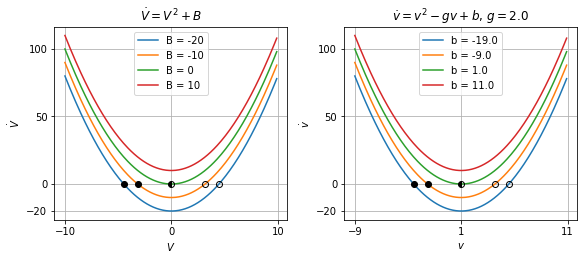

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize = [8,3.5], constrained_layout = True)
# mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
def f(x, B):
  return x ** 2 + B

Bs = np.arange(-20,20,10)

# mudança de variables: B = b - g ** 4 and V = v - g/2
g = 2.
for B in Bs:
  # fig, ax = plt.subplots(1,2)
  V = np.arange(-10, 10, 0.1)
  v = V + g / 2
  b = (g ** 2) / 4 + B
  V_dot = f(V,B)
  v_dot = f(v,b) - g * v
  ax[0].plot(V, V_dot, label = 'B = {b}'.format(b = round(B, 2)))
  ax[1].plot(v, v_dot, label = 'b = {b}'.format(b = round(b, 2)))
  if B < 0:
    V_menos = -np.sqrt(-B)
    V_mais = np.sqrt(-B)
    v_menos = -np.sqrt(-B) + g/2
    v_mais = np.sqrt(-B) + g/2
    ax[0].plot(V_menos, 0, 'o', color = 'k')#, fillstyle = 'none')
    ax[0].plot(V_mais, 0, 'o', color = 'k', fillstyle = 'none')
    ax[1].plot(v_menos, 0, 'o', color = 'k')#, fillstyle = 'none')
    ax[1].plot(v_mais, 0, 'o', color = 'k', fillstyle = 'none')
  if B == 0:
    V_mais = np.sqrt(B)
    ax[0].plot(V_mais, 0, 'o', color = 'k', fillstyle = 'left')
    ax[1].plot(V_mais + g / 2, 0, 'o', color = 'k', fillstyle = 'left')
ax[0].set_title(r'$\dot{V} = V^2 + B$')
ax[1].set_title(r'$\dot{v} = v^2 - gv + b$, $g = 2.0$')
ax[0].set_ylabel(r'$\dot{V}$')
ax[0].set_xlabel(r'$V$')
ax[1].set_ylabel(r'$\dot{v}$')
ax[1].set_xlabel(r'$v$')
ax[0].set_xticks(ticks = [-10,0, 10])#, labels = ['0.', '0.1', 'min'])
ax[1].set_xticks(ticks = [-9,1, 11])#, labels = ['0.', '0.1', 'min'])
ax[1].set_yticks(ticks = [-20,0, 50, 100])#, labels = ['0.', '0.1', 'min'])
ax[0].set_yticks(ticks = [-20,0, 50, 100])#, labels = ['0.', '0.1', 'min'])
ax[0].grid(True)
ax[0].legend()
ax[1].grid(True)
ax[1].legend()
plt.savefig('pocos')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = .5
a = .2
beta_init = 1#np.sqrt(4 * b) + .1

T = []

for g in [beta_init, beta_init + 2 * a, beta_init + 4 * a, g_init + 6 * a, g_init + 8 * a]:

  if g != g_init:
    b += g * a - a ** 2
  v_min = g/2

  v = np.arange(v_min - .5, v_min + .5, 0.01)
  vdot = b - g * v + v ** 2
  v_menos = (g - np.sqrt(g ** 2 - 4 * b))/2
  v_mais = (g + np.sqrt(g ** 2 - 4 * b))/2 

  plt.plot(v, vdot, label = 'b = {b}, g = {g}'.format(b = round(b, 2), g = round(g, 2)))
  plt.plot(v_menos, 0, 'o', color = 'k')
  plt.plot(v_mais, 0, 'o', color = 'k', fillstyle = 'none')

plt.yticks(ticks = [0, 0.1, min(vdot)], labels = ['0.', '0.1', 'min'])
plt.xticks(ticks = [0.5, 1., 1.5, 2.])
plt.grid(True)
plt.legend()
# plt.savefig('frequency')
plt.show()

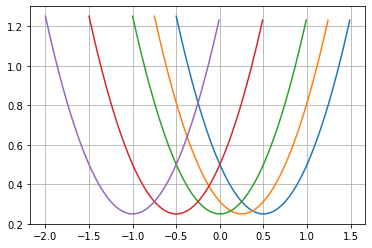

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

b = .5
g = 1.
for a in [0, 0.25, .5, 1., 1.5]:
  v_min = g/2 - a

  v = np.arange(v_min - 1, v_min + 1, 0.01)
  vdot = b - g * (v + a) + (v + a) ** 2

  plt.plot(v, vdot)
plt.grid(True)
plt.show()